Can we use the same number of vertical points, give up some resolution from 15 - 25 m to increase our resolution below to 250 m?  Our current resolution:

          level  gdept_1d  gdepw_1d  e3t_1d   e3w_1d  
             1     0.50     0.00     1.00     1.00
             2     1.50     1.00     1.00     1.00
             3     2.50     2.00     1.00     1.00
             4     3.50     3.00     1.00     1.00
             5     4.50     4.00     1.00     1.00
             6     5.50     5.00     1.00     1.00
             7     6.50     6.00     1.00     1.00
             8     7.50     7.00     1.00     1.00
             9     8.50     8.00     1.00     1.00
            10     9.50     9.00     1.00     1.00
            11    10.50    10.00     1.00     1.00
            12    11.51    11.01     1.01     1.00
            13    12.52    12.01     1.01     1.01
            14    13.54    13.03     1.02     1.02
            15    14.57    14.05     1.05     1.03
            16    15.63    15.10     1.09     1.06
            17    16.76    16.19     1.17     1.12
            18    18.01    17.36     1.34     1.24
            19    19.48    18.71     1.65     1.47
            20    21.39    20.36     2.23     1.89
            21    24.10    22.61     3.29     2.68
            22    28.23    25.94     5.12     4.09
            23    34.69    31.10     7.97     6.41
            24    44.52    39.12    11.83     9.80
            25    58.48    50.96    16.11    13.97
            26    76.59    67.05    19.96    18.14
            27    98.06    86.97    22.81    21.52
            28   121.87   109.74    24.64    23.84
            29   147.09   134.35    25.70    25.25
            30   173.11   160.03    26.29    26.04
            31   199.57   186.31    26.60    26.47
            32   226.26   212.90    26.76    26.69
            33   253.07   239.65    26.84    26.81
            34   279.93   266.50    26.89    26.87
            35   306.83   293.38    26.91    26.90
            36   333.75   320.29    26.92    26.92
            37   360.67   347.21    26.93    26.92
            38   387.60   374.14    26.93    26.93
            39   414.53   401.07    26.93    26.93
            40   441.47   428.00    26.93    26.93


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Original Grid Spacing
depth_orig = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11.01, 12.01, 13.03, 14.05, 15.1,
    16.19, 17.36, 18.71, 20.36, 22.61, 25.94, 31.1, 39.12, 50.96, 67.05, 86.97, 109.74,
    134.35, 160.03, 186.31, 212.9, 239.65, 266.5, 293.38, 320.29, 347.21, 374.14,
    401.07, 428])
delta_depth_orig = np.zeros([39]); central_depth_orig = np.zeros([39])
delta_depth_orig = depth_orig[1:40] - depth_orig[0:39]
central_depth_orig = depth_orig[0:39] + delta_depth_orig/2.

In [63]:
# Proposed Grid Spacing
# Top grid point, corrected for tails of tanh functions
a = 1-0.02068635-0.00153595-0.00000149177
ao = 1.0000016639914775*1.000000000002769
# first tanh function (change across tanh, width, position)
b = 3; c = 6; d = 16.7 - 1.
# second tanh function
e = 13; f = 5.5; g = 22 - 1.
# third tanh function
h = 16; i = 5; j = 33.877- 1.
p = np.arange(39)
delta_depth_new = a + b/2.*(1+np.tanh((p-d)/c)) + e/2.*(1+np.tanh((p-g)/f)) + h/2.*(1+np.tanh((p-j)/i))
dorig = 1/ao + 14.4*(1+np.tanh((p-25)/3))
depth_new = np.zeros([40]); central_depth_new = np.zeros([30]); orig=np.zeros((40))
depth_new[0] = 0.
orig[0] = 0.
for ip in p:
    depth_new[ip+1] = depth_new[ip] + delta_depth_new[ip]
    orig[ip+1] = orig[ip] + dorig[ip]
central_depth_new = depth_new[0:39] + delta_depth_new/2.
corig = orig[:39] + dorig/2.
print ('Surface cell Size = ',depth_new[1], 'Bottom Depth = ',depth_new[-1])
print ('Surface cell Size = ',orig[1], 'Bottom Depth = ',orig[-1])
print ('Surface cell Size = ',depth_orig[1], 'Bottom Depth = ',depth_orig[-1])

Surface cell Size =  0.9999999999959206 Bottom Depth =  428.00057716093744
Surface cell Size =  0.9999999999999999 Bottom Depth =  427.8051668834645
Surface cell Size =  1.0 Bottom Depth =  428.0


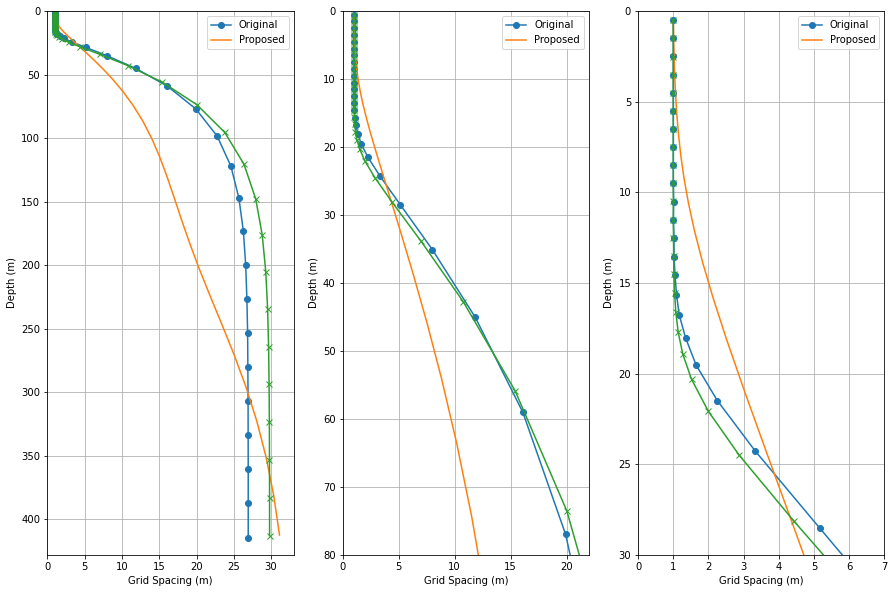

In [64]:
fig, axs = plt.subplots(1,3,figsize=(15,10))
axs[0].set_ylim(top = depth_orig[0], bottom = depth_orig[-1])
axs[0].set_xlim(right = 33)
axs[1].set_ylim(top = depth_orig[0], bottom = 80.)
axs[1].set_xlim(right = 22)
axs[2].set_ylim(top = depth_orig[0], bottom = 30.)
axs[2].set_xlim(right = 7)
for ax in axs:
    ax.plot(delta_depth_orig, central_depth_orig, 'o-', label="Original")
    ax.plot(delta_depth_new, central_depth_new, label="Proposed")
    ax.plot(dorig, corig, 'x-')
    ax.set_xlabel('Grid Spacing (m)')
    ax.set_ylabel('Depth (m)')
    ax.legend(); ax.grid()

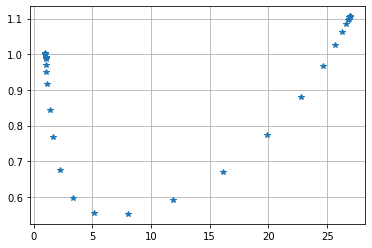

In [58]:
plt.plot(delta_depth_orig, dorig/delta_depth_orig, '*')
plt.grid()

In [280]:
# Proposed Grid Spacing
# Top grid point, corrected for tails of tanh functions
a = 0.5
ao = 0.5
ab = 0.333
ac = 1.0
# first tanh function (change across tanh, width, position)
b = 4.8; c = 5; d = 38
# second tanh function
e = 0.3; f = 5; g = 20.
# third tanh function
h = 4.54; i = 3; j = 38
p = np.arange(79)
delta_depth_new = a + b*(1+np.tanh((p-d)/c)) #+ e/2.*(1+np.tanh((p-g)/f)) + h/2.*(1+np.tanh((p-j)/i))
another = ab + e*(1+np.tanh((p-g)/f)) + 0.*(1+np.tanh((p-30)/5)) + h*(1+np.tanh((p-j)/i))

deep = ac + 3.33*(1+np.tanh((p-26)/5))

dorig = ao + 6.9*(1+np.tanh((p-50)/6))
depth_new = np.zeros([80]); central_depth_new = np.zeros([80]); orig=np.zeros((80)); ano_depth=np.zeros((80))
deep_depth = np.zeros((80))
for ip in p:
    depth_new[ip+1] = depth_new[ip] + delta_depth_new[ip]
    orig[ip+1] = orig[ip] + dorig[ip]
    ano_depth[ip+1] = ano_depth[ip] + another[ip]
    deep_depth[ip+1] = deep_depth[ip] + deep[ip]
                                        
        
central_depth_new = depth_new[0:79] + delta_depth_new/2.
corig = orig[:79] + dorig/2.
cano = ano_depth[:79] + another/2.
cdepth = deep_depth[:79] + deep/2.
print ('Surface cell Size = ',depth_new[1], 'Bottom Depth = ',depth_new[-1])
print ('Surface cell Size = ',orig[1], 'Bottom Depth = ',orig[-1])
print ('Surface cell Size = ',ano_depth[1], 'Bottom Depth = ',ano_depth[-1])
print ('Surface cell Size = ',deep_depth[1], 'Bottom Depth = ',deep_depth[-1])
print ('Surface cell Size = ',depth_orig[1], 'Bottom Depth = ',depth_orig[-1])

Surface cell Size =  0.500002404335115 Bottom Depth =  428.29999730798824
Surface cell Size =  0.5000007973292496 Bottom Depth =  432.80308243623193
Surface cell Size =  0.33320121016863635 Bottom Depth =  429.146590808535
Surface cell Size =  1.0002026741689578 Bottom Depth =  428.6495879188369
Surface cell Size =  1.0 Bottom Depth =  428.0


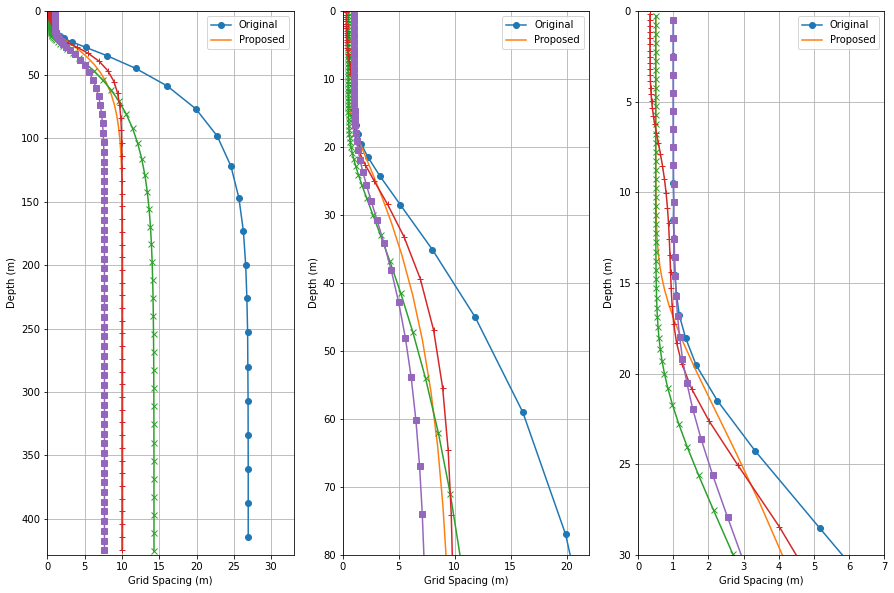

In [281]:
fig, axs = plt.subplots(1,3,figsize=(15,10))
axs[0].set_ylim(top = depth_orig[0], bottom = depth_new[-1])
axs[0].set_xlim(right = 33)
axs[1].set_ylim(top = depth_orig[0], bottom = 80.)
axs[1].set_xlim(right = 22)
axs[2].set_ylim(top = depth_orig[0], bottom = 30.)
axs[2].set_xlim(right = 7)
for ax in axs:
    ax.plot(delta_depth_orig, central_depth_orig, 'o-', label="Original")
    ax.plot(delta_depth_new, central_depth_new, label="Proposed")
    ax.plot(dorig, corig, 'x-')
    ax.plot(another, cano, '+-')
    ax.plot(deep, cdepth, 's-')
    ax.set_xlabel('Grid Spacing (m)')
    ax.set_ylabel('Depth (m)')
    ax.legend(); ax.grid()